<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/Homework/Week4/22p22c0044_%E0%B8%A8%E0%B8%B8%E0%B8%A0%E0%B8%8A%E0%B8%B1%E0%B8%A2_W4HW1_12102020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.utils import resample, shuffle

In [28]:
df_image = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/mnist.train.map.csv')

In [29]:
df_image

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
8250,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,8
8251,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,6
8252,4ec2ba63-0845-4812-a3fa-1f5eda80de8e.png,8
8253,8479e8d8-d592-4931-926c-17a84b02ad0a.png,2


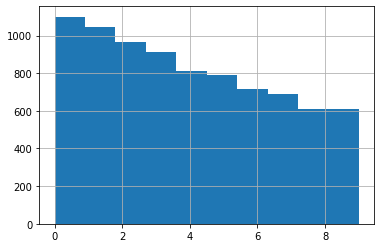

In [30]:
df_image['category'].hist()
plt.show()

In [31]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8255 entries, 0 to 8254
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        8255 non-null   object
 1   category  8255 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 129.1+ KB


In [32]:
df_image.groupby(['category']).agg(['count'])

,id
,count
category,
0,1100
1,1048
2,966
3,910
4,809
5,790
6,718
7,691


# Over sample

In [33]:
max_size = df_image['category'].value_counts().max()

In [34]:
lst = [df_image]
for class_index, group in df_image.groupby('category'):
    lst.append(group.sample(max_size-len(group), replace=True))
df_upsampled = pd.concat(lst)

In [35]:
df_upsampled.groupby(['category']).agg(['count'])

,id
,count
category,
0,1100
1,1100
2,1100
3,1100
4,1100
5,1100
6,1100
7,1100


# Train

In [132]:
from sklearn.model_selection import KFold
from keras.applications.resnet50 import ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from PIL import Image, ImageOps
import numpy as np
import requests
import io
import PIL
from sklearn.preprocessing import normalize

model = ResNet50(include_top=False, weights='imagenet', classes=1000)

def extract_feature(imgpath):
  if imgpath.find('http')!=-1:
      r = requests.get(imgpath, allow_redirects=True, timeout=10)
      image_bytes = io.BytesIO(r.content)
      img = PIL.Image.open(image_bytes)
  else:
      img = image.load_img(imgpath)
  img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)
  x = image.img_to_array(img)[:,:,:3]
  #average = np.average(x[:,:,3])
  #print(x.shape)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x, batch_size=1,verbose=0)
  features = np.ndarray.flatten(features).astype('float64')
  feat = normalize([features])[0]
  return feat

In [128]:
df_raw = df_upsampled[:]

In [133]:
df_raw

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
5545,be64b687-a4fd-457a-a631-22faa4ed2417.png,9
1466,577066ef-1f4e-4011-bd6e-f81bffb84602.png,9
6069,4236080b-6267-474d-80b1-9f9fdc364b01.png,9
7784,dd6d37ec-fb71-453f-9dd0-c45912101b3b.png,9


In [134]:
feature = []
verbose = 10
for index, row in df_raw.iterrows():
  f = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/train/{row['id']}?raw=true''')
  feature.append(f)
  if index % verbose == 0:
    print(f'''index:{index} data:{row['id']}, {row[1]}''')
df_raw['feature']=feature

index:0 data:75606737-d17d-43eb-86e6-6735b6f45a52.png, 8
index:10 data:9f8baef0-f96b-4faf-84c1-006edb606d09.png, 9
index:20 data:3b115b22-c9a2-4ecb-95c4-4ab23e620480.png, 6
index:30 data:6024e758-b319-4545-9be7-8afb3a6b6a45.png, 1
index:40 data:36dfb6a8-57f4-465b-a13b-81cb4a0fcbf3.png, 4
index:50 data:590dc139-fa5a-47b1-a3f4-0d08f5567267.png, 7
index:60 data:dd5a99ca-e382-4742-a41c-48dfce22e1ec.png, 0
index:70 data:c44f88cf-f033-4370-98fe-990a64cefa49.png, 1
index:80 data:4a46d626-7b35-4238-a288-afaa367df575.png, 0
index:90 data:e1f6e1b4-a495-4f6f-93df-24c0a6a212da.png, 0
index:100 data:a8164c5d-4bdd-416d-8ba1-5260c4737796.png, 2
index:110 data:2b00dcb8-a9c5-47a8-957f-064a25636df7.png, 0
index:120 data:362b4003-f858-4945-a614-29af7ac8c6f4.png, 8
index:130 data:763f7c7e-4d33-42c5-95b6-d1a03a8659c3.png, 0
index:140 data:dede57fb-ecdf-461d-8ec4-c81f7a69ae26.png, 8
index:150 data:26b5f692-035c-4a0c-8783-590bbf297861.png, 3
index:160 data:9c8028ee-320c-4c00-a0c0-54c9e8df2161.png, 0
index:17

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
df_raw

,id,category,feature
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003797173668..."
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004022961074..."
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
5545,be64b687-a4fd-457a-a631-22faa4ed2417.png,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1466,577066ef-1f4e-4011-bd6e-f81bffb84602.png,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6069,4236080b-6267-474d-80b1-9f9fdc364b01.png,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001660006995..."
7784,dd6d37ec-fb71-453f-9dd0-c45912101b3b.png,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [136]:
df_raw.to_csv('feature_extaction.csv',index=False)

In [138]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
def trainmodel(dataset,num_folds,modfile=''):
  trainfeat, testfeat, trainlabel, testlabel = train_test_split(dataset['feature'], dataset['category'], test_size=0.33, random_state=42)
  #return trainfeat,testfeat,trainlabel,testlabel
  clf = LinearSVC()
  clf = CalibratedClassifierCV() 
  
  
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(trainfeat, trainlabel):
    mod = clf.fit(np.vstack(trainfeat.values[train]),np.vstack(trainlabel.values[train]))
    
    res = mod.predict(np.vstack(trainfeat.values[test].ravel()))
    
    acc=0
    acc = sum(res == trainlabel.values[test])/len(res)
    print(f'fold{fold_no} acc:{acc}')
    fold_no = fold_no + 1

  res = mod.predict(np.vstack(testfeat.values.ravel()))  
  acc = sum(res == testlabel.values)/len(res)
  print(f'acc with test data {acc}')
  if modfile!='':
      pickle.dump(mod,open(modfile,'wb'))
  conf = mod.predict_proba(np.vstack(testfeat.values))
  return mod,acc,conf,testlabel

In [ ]:
mod,acc,conf,testlabel = trainmodel(df_raw,3,'class_model.mod')

In [1]:
acc

NameError: ignored